# 案例分析 - 泰坦尼克数据

* 本案例将重点分析泰坦尼克号沉船事故，我们将探索是**什么因素决定了最后是否生还**。

![news](news.jpeg)

### 泰坦尼克号背景介绍
泰坦尼克号是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

## 数据导入和观察

In [1]:
# 读取常用的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 读取数据
train = pd.read_csv(r'C:\Users\10547\Desktop\titanic.csv')
test = pd.read_csv(r'C:\Users\10547\Desktop\test.csv')

print('训练数据集',train.shape)
print('测试数据集',test.shape)

训练数据集 (891, 12)
测试数据集 (418, 11)


In [3]:
# 查看前五行数据
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


** 数据字段说明 **

* PassengerId:  乘客的id
* Survival: 	是否幸存	0 = No, 1 = Yes
* Pclass:	舱位        class	1 = 1st, 2 = 2nd, 3 = 3rd
* Name:     姓名
* Sex:	    性别
* Age:	    年龄
* SibSp:	    船上兄弟姐妹以及配偶的个数
* Parch:     船上父母以及者子女的个数
* Ticket:	船票号码	
* Fare:	票价
* Cabin:	船舱号码
* Embarked: 登船码头 C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
print('训练数据集',train.columns)
print('测试数据集',test.columns)

训练数据集 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
测试数据集 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


训练数据集比测试数据集多了‘Survived’这一列，这一列正是我们这个案例要预测的目标。

In [6]:
#将测试集和训练集合并来进行清理，确保两数据集的特征一致
full = train.append(test,ignore_index = True)
print('合并后的数据集',full.shape)

合并后的数据集 (1309, 12)


In [7]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据的统计描述

In [8]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


年龄缺失：263条；船票价格缺失：1条；船舱号缺失：1014条；登录港口缺失2条

In [10]:
# 使用include=[np.object]来查看分类变量
# count: 非缺失值的个数
# unique: 非重复值得个数
# top: 最高频值
# freq: 最高频值出现次数
full.describe(include=[np.object]) #离散型数据分布

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


### 不同舱位的分布情况是怎样的呢？


In [11]:
# 查看不同舱位的分布
# 头等舱：24%； 二等舱：21%； 三等舱：55%
# value_counts 频数统计， len() 获取数据长度
train.Pclass.value_counts() / len(train) 

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

查看Embarked(登船码头)人数分布的百分比

In [12]:
# 使用 value_counts
train.Embarked.value_counts()/ len(train)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

## 离散型特征与生存率之间的关联性初探

### 舱位与生还概率

In [13]:
# pivot table中文为数据透视表
# values: 聚合后被施加计算的值，这里我们施加mean函数
# index: 分组用的变量
# aggfunc: 定义施加的函数
# 注意：因为Survived是0-1函数，所以均值即表示生还百分比
train.pivot_table(values='Survived', index='Pclass', aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

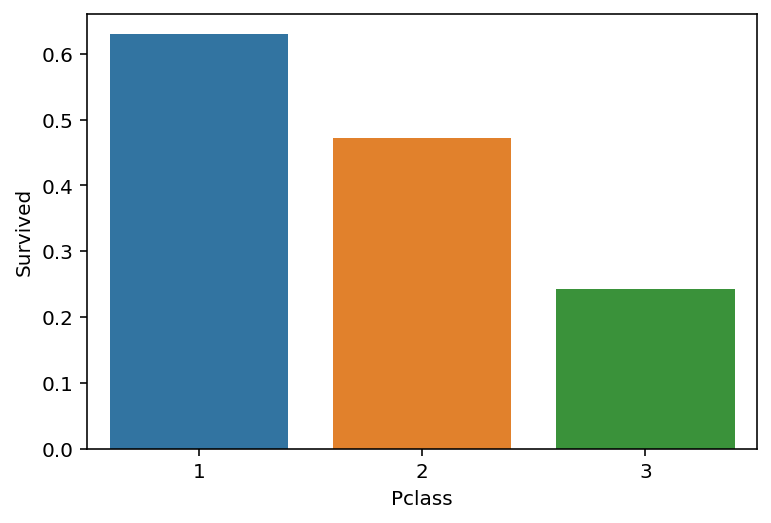

In [14]:
# 使用sns.barplot做条形图，图中y轴给出 Survived 均值的点估计
sns.barplot(data=train, x='Pclass', y='Survived', ci=None)

**结论**：头等舱的生还概率最大，其次是二等舱，三等舱的概率最小。

### 性别与生还概率

In [15]:
train.pivot_table(values='Survived',index='Sex',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

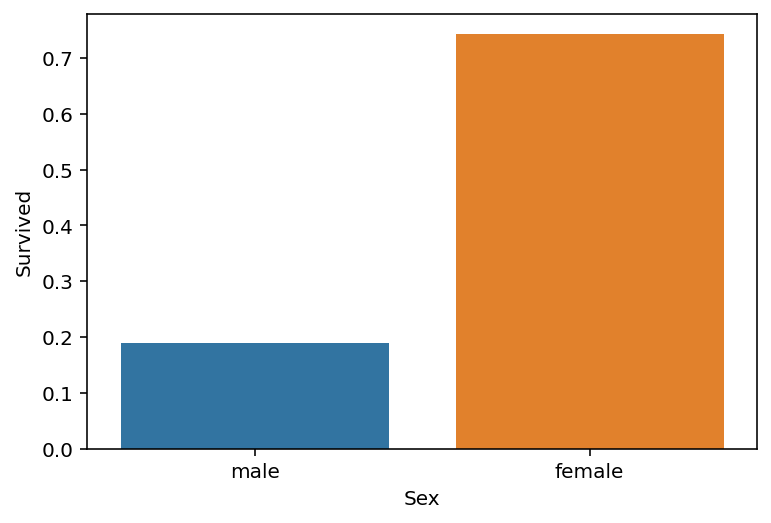

In [16]:
# 绘制条形图
sns.barplot(data=train, x='Sex', y='Survived', ci=None)

**结论**： 女性的生存概率远高于男性，可能救援时女性优先原则

### Embarked与Survived

In [17]:
train[['Embarked', 'Survived']].groupby('Embarked').mean() \
    .sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**结论**：码头C的获救概率高于Q高于S

## SibSp与survived

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

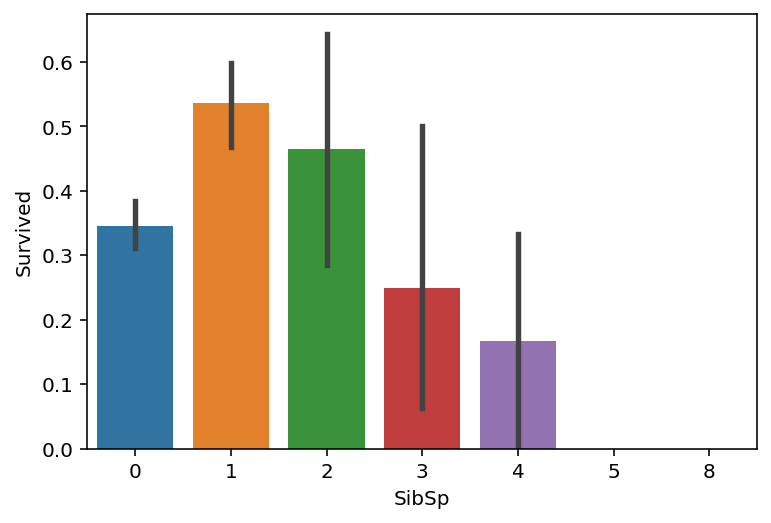

In [18]:
sns.barplot(data=train,x='SibSp',y='Survived')

**结论：** 当乘客同行的同辈数量适中时生存率较高

## Parch与Survived

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

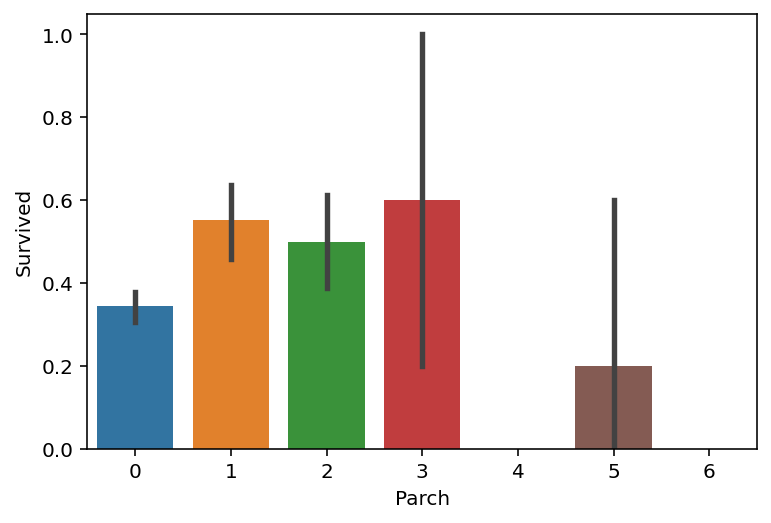

In [19]:
sns.barplot(data=train,x='Parch',y='Survived')

**结论：**船上父母以及者子女的个数适中时，获救概率较高

## Age与Survived

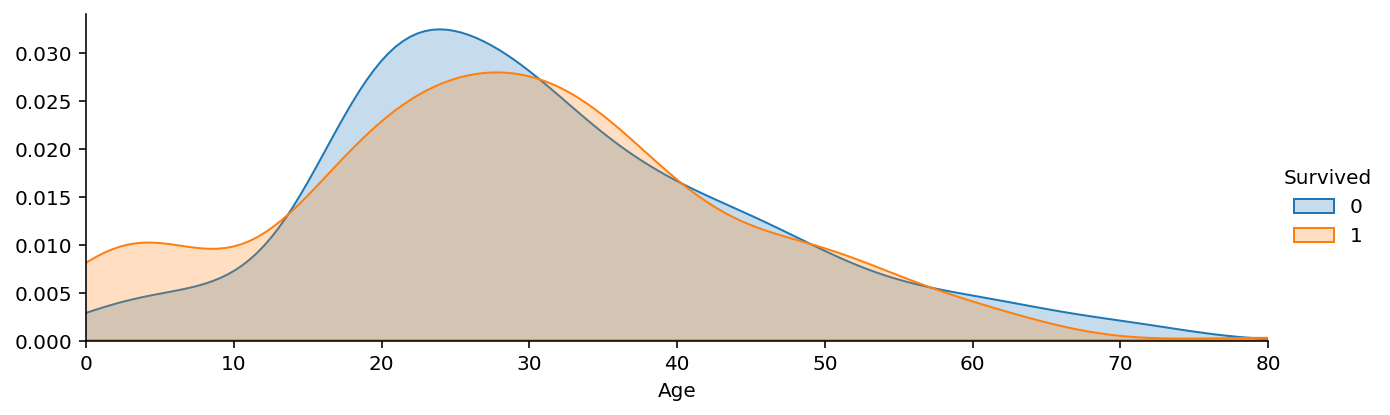

In [20]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

**结论：**0-14岁的乘客生还率较高，14-30岁的乘客生还率较低

## Fare与Survived

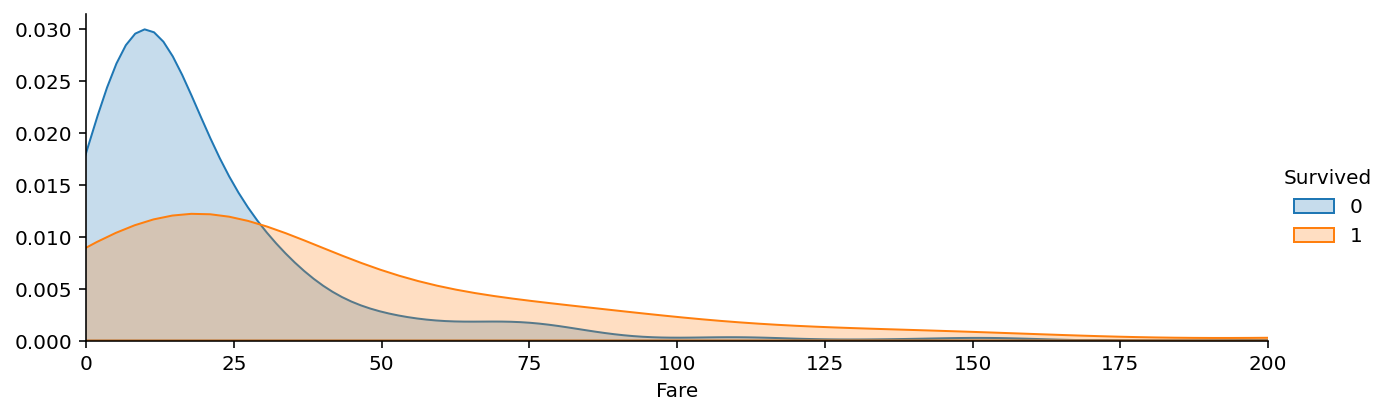

In [21]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,200))
ageFacet.add_legend()

**结论：**票价在0-25时生存率较低，大于25时票价越高，生存率越高

### 综合考虑舱位和性别的因素，与生还概率的关系

In [22]:
train.pivot_table(values='Survived', index=['Pclass', 'Sex'], aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

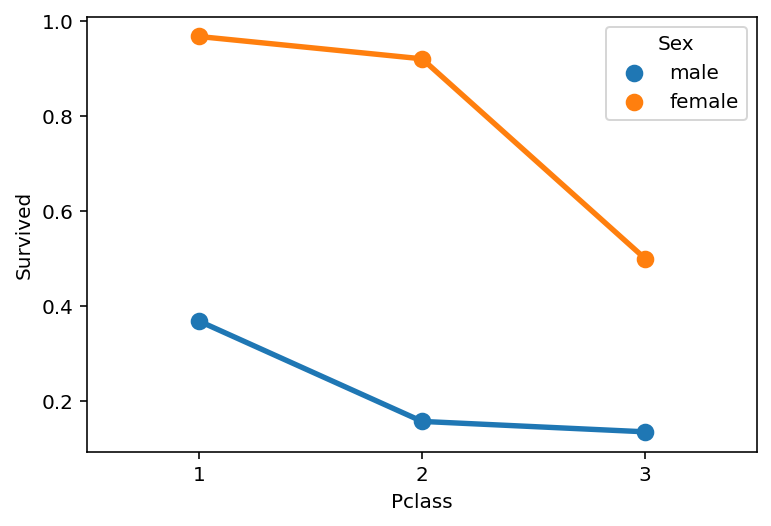

In [23]:
# 绘制折线图：使用sns.pointplot
sns.pointplot(data=train, x='Pclass', y='Survived', hue='Sex', ci=None)

**结论：**在各个舱位中，女性的生还概率都远大于男性。一二等舱的女性生还率接近，且远大于三等舱。一等舱的男性生还率大于二三等舱，二三等舱的男性生还率接近。

## 数据预处理

### 数据清洗

In [24]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Age缺失值填充

In [25]:
#我们综合考虑性别和舱位的中位数来填充
# 重新载入原始数据
train = pd.read_csv(r'C:\Users\10547\Desktop\titanic.csv')
test = pd.read_csv(r'C:\Users\10547\Desktop\test.csv')
full = train.append(test,ignore_index = True)

# 分组计算不同舱位男女年龄的中位数， 得到一个Series数据，索引为Pclass,Sex
age_median = full.groupby(['Pclass', 'Sex']).Age.median()

# 设置Pclass, Sex为索引， inplace=True表示在原数据titanic_df上直接进行修改
full.set_index(['Pclass','Sex'], inplace=True)
# 使用fillna填充缺失值，根据索引值填充
full.Age.fillna(age_median, inplace=True)
# 重置索引，即取消Pclass,Sex索引
full.reset_index(inplace=True)

# 查看Age列的统计值
full.Age.describe()

count    1309.000000
mean       29.261398
std        13.218275
min         0.170000
25%        22.000000
50%        26.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

### Cabin缺失值填充

In [26]:
#Cabin缺失值较多，我们用U(unknow)填充
full['Cabin'] = full['Cabin'].fillna('U')
full['Cabin'].head(5)

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

### Embarked缺失值填充

In [27]:
#Embarked缺失两条数据，我们先查看其数据分布
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
#乘客在Southampton登船的概率远大于其他，所以考虑用S填充缺失数据
full['Embarked'] = full['Embarked'].fillna('S')

### Fare缺失值填充

In [29]:
# 查看数据缺失情况
full[full['Fare'].isnull()]

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,3,male,1044,NaN,"Storey, Mr. Thomas",60.5,0,0,3701,NaN,U,S


In [30]:
#我们利用Pclass为3，Embarked为S的平均值来填充
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean())

In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Sex          1309 non-null   object 
 2   PassengerId  1309 non-null   int64  
 3   Survived     891 non-null    float64
 4   Name         1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### 特征工程

In [32]:
#构造新特征Title
full['Title'] = full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Don               1
Jonkheer          1
Mme               1
Dona              1
the Countess      1
Sir               1
Capt              1
Name: Title, dtype: int64

In [33]:
#将相近特征整合在一起
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title'] = full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

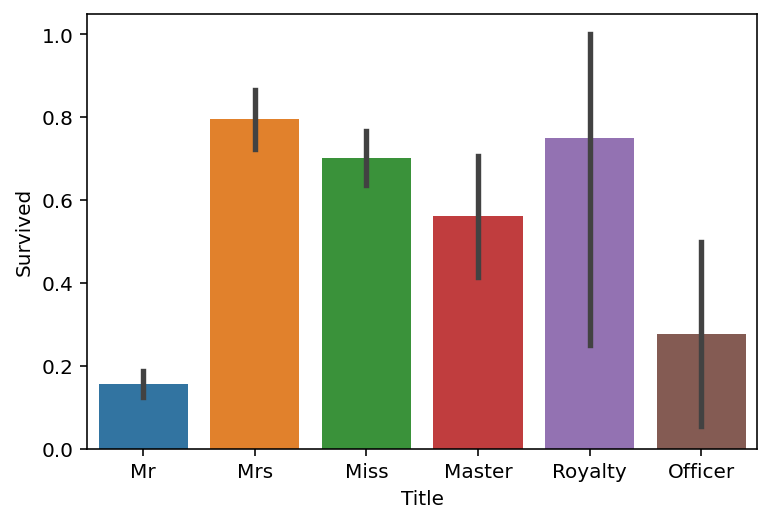

In [34]:
#可视化分析Title与Survived之间关系
sns.barplot(data=full,x='Title',y='Survived')

**结论：**头衔为'Mr'及'Officer'的乘客，生存率明显较低

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

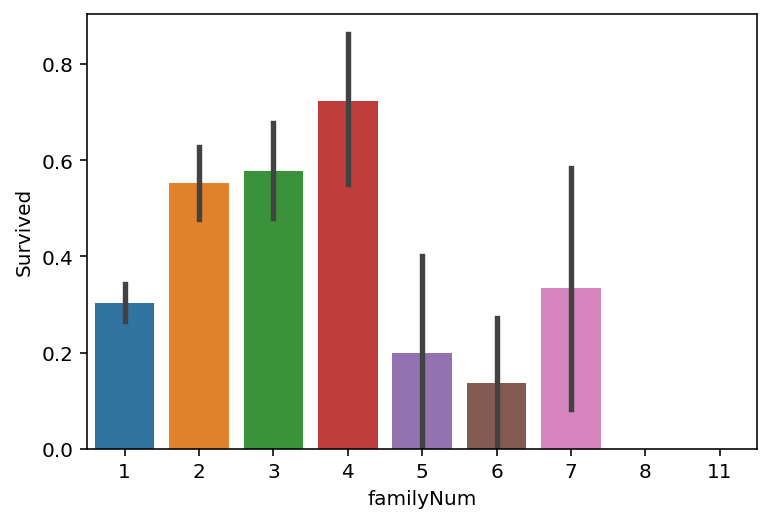

In [35]:
#将Parch及SibSp字段整合得到一名乘客同行家庭成员总人数FamilyNum的字段
full['familyNum'] = full['Parch'] + full['SibSp'] + 1

#查看familyNum与Survived
sns.barplot(data=full,x='familyNum',y='Survived')

**结论：**家庭成员人数在2-4人时，乘客的生存率较高，当没有家庭成员同行或家庭成员人数过多时生存率较低

In [36]:
#新建familySIZE字段将familyNum整合为家庭规模为大、中、小3个类型，并分别编码为0、1、2
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

In [37]:
full['familySize'] = full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

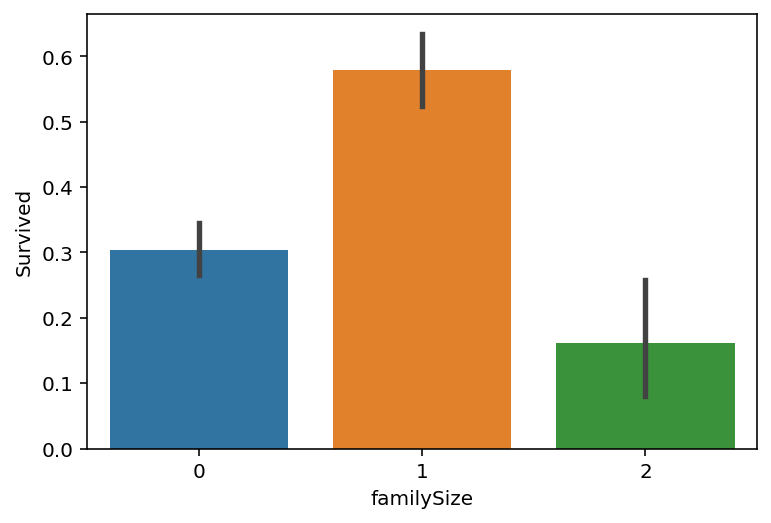

In [38]:
#查看familySize与Survived
sns.barplot(data=full,x='familySize',y='Survived')

**结论:**家庭规模适中时，生还率较高

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

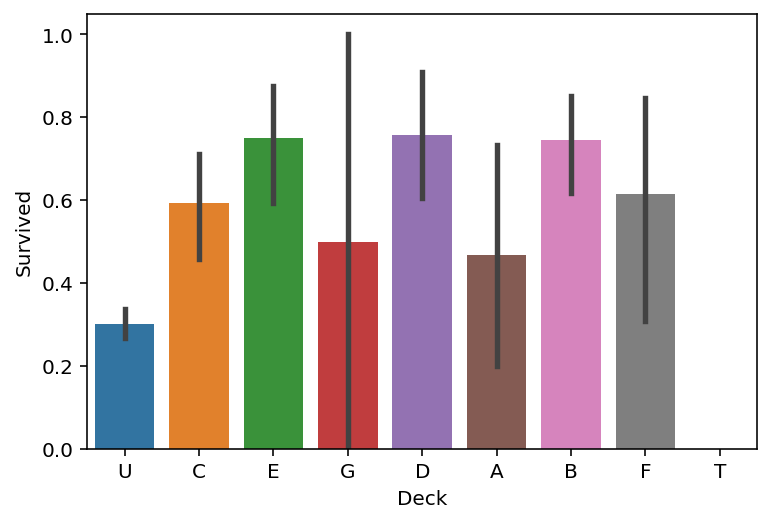

In [39]:
#Cabin字段的首字母代表客舱的类型，也反映不同乘客群体的特点，可能也与乘客的生存率相关
full['Deck'] = full['Cabin'].map(lambda x:x[0])
#查看不同Deck类型乘客的生存率
sns.barplot(data=full,x='Deck',y='Survived')

In [40]:
#同一票号的乘客数量可能不同，可能也与乘客生存率有关系
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()

TickCountDict.head()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
3101295      7
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

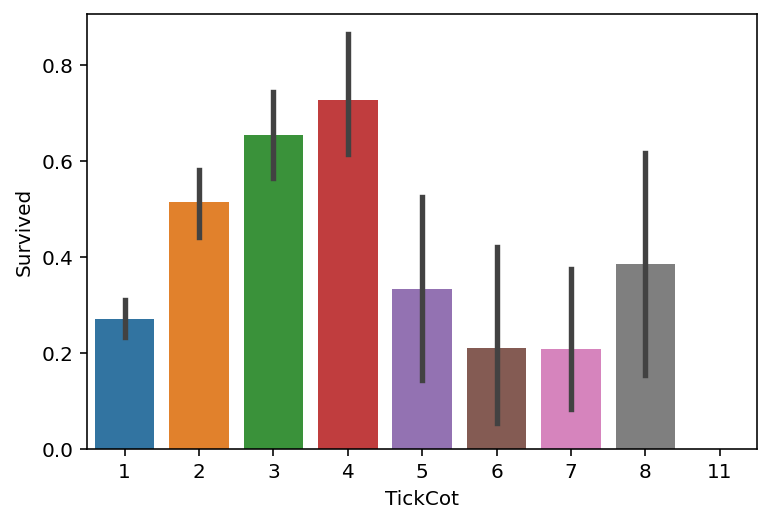

In [41]:
full['TickCot']=full['Ticket'].map(TickCountDict)
#查看TickCot与Survived之间关系
sns.barplot(data=full,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

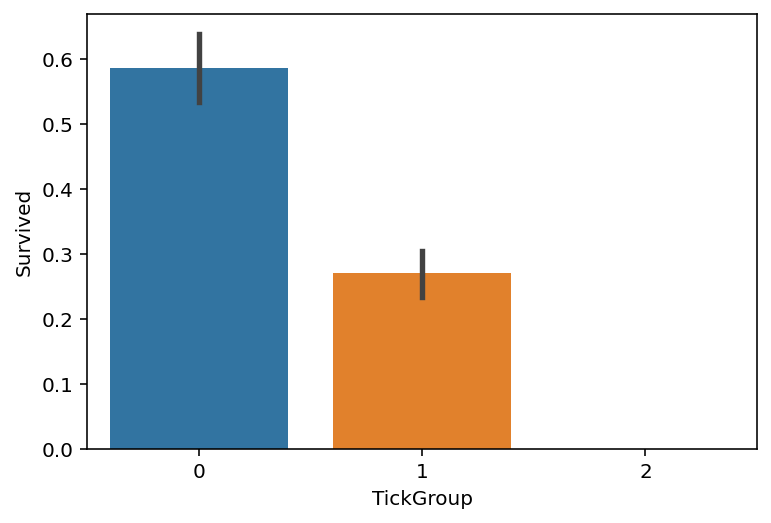

In [42]:
#按照TickCot大小，将TickGroup分为三类
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else:
        return 2
    
full['TickGroup']=full['TickCot'].map(TickCountGroup)

sns.barplot(data=full,x='TickGroup',y='Survived')

In [43]:
full.head(3)

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
0,3,male,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,1,U,1,1
1,1,female,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,C,2,0
2,3,female,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,0,U,1,1


## 筛选子集

In [44]:
#先删除之前处理过的重复的特征
fullsel = full.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [45]:
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullsel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.058635
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

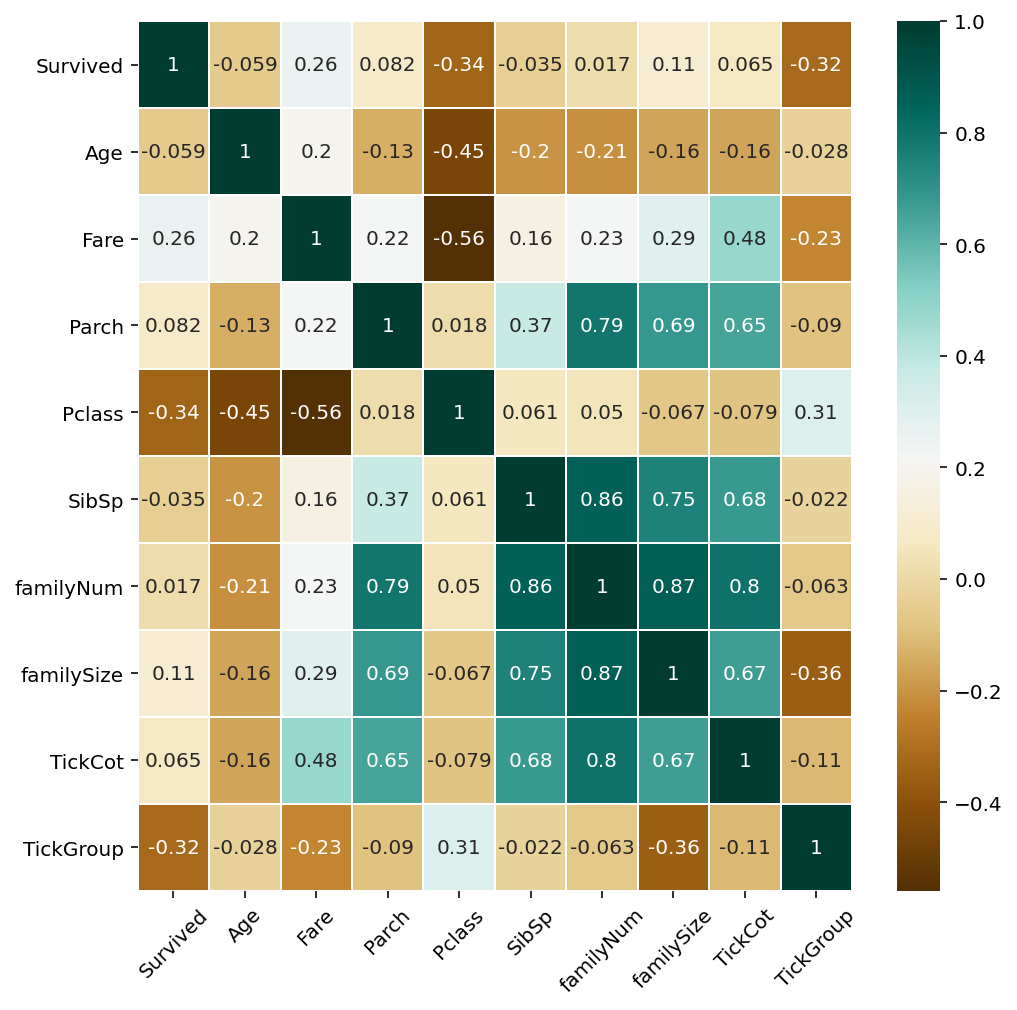

In [46]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(8,8))
sns.heatmap(fullsel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [47]:
#查看各特征与标签的相关性(spearman系数)
corrDf=pd.DataFrame()
corrDf=fullsel.corr('spearman')
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.339668
TickGroup    -0.319136
Age          -0.037276
SibSp         0.088879
Parch         0.138266
familySize    0.160356
familyNum     0.165463
TickCot       0.215865
Fare          0.323736
Survived      1.000000
Name: Survived, dtype: float64

In [48]:
#综合前面几个指标，我们继续删除低相关特征，其中Age在前面的可视化分析中认为是相关性很强的，故保留
fullsel=fullsel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
fullsel.head()

,Pclass,Sex,Survived,Age,Fare,Embarked,Title,familySize,Deck,TickGroup
0,3,male,0.0,22.0,7.2500,S,Mr,1,U,1
1,1,female,1.0,38.0,71.2833,C,Mrs,1,C,0
2,3,female,1.0,26.0,7.9250,S,Miss,0,U,1
3,1,female,1.0,35.0,53.1000,S,Mrs,1,C,0
4,3,male,0.0,35.0,8.0500,S,Mr,0,U,1


In [49]:
#one-hot编码
fullsel=pd.get_dummies(fullsel)
fullsel

,Pclass,Survived,Age,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,3,0.0,22.0,7.2500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.0,38.0,71.2833,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,26.0,7.9250,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,35.0,53.1000,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,0.0,35.0,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,NaN,25.0,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,1,NaN,39.0,108.9000,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1306,3,NaN,38.5,7.2500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,3,NaN,25.0,8.0500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullsel=pd.concat([fullsel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [51]:
fullsel

,Pclass,Survived,Age,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_U,Pclass_1,Pclass_2,Pclass_3,TickGroup_0,TickGroup_1,TickGroup_2,familySize_0,familySize_1,familySize_2
0,3,0.0,22.0,7.2500,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1,1.0,38.0,71.2833,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3,1.0,26.0,7.9250,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,1,1.0,35.0,53.1000,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,3,0.0,35.0,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,NaN,25.0,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1305,1,NaN,39.0,108.9000,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1306,3,NaN,38.5,7.2500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1307,3,NaN,25.0,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0


## 构建模型

### 建立模型

**使用的模型**\
Random Forest\
Linear Discriminant Analysis\
Logistic Regression\
Knn\
Decision Tree\
Gradient Boosting\
Extra Trees\
SVC

In [52]:
#拆分实验数据与预测数据
experData=fullsel[fullsel['Survived'].notnull()]
preData=fullsel[fullsel['Survived'].isnull()]

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)

In [53]:
#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

In [54]:
#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

In [55]:
#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [56]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

In [57]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [58]:
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.680212,0.041978,SVC
1,0.780112,0.044668,DecisionTreeCla
2,0.823833,0.038391,RandomForestCla
3,0.801373,0.038123,ExtraTreesCla
4,0.831698,0.043277,GradientBoostingCla
5,0.734032,0.031147,KNN
6,0.832809,0.038547,LR
7,0.827203,0.032743,LinearDiscrimiAna


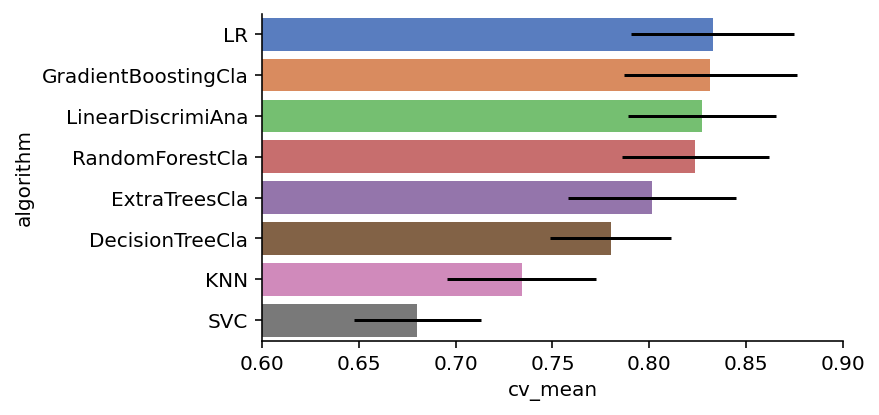

In [59]:
#可视化查看不同算法的表现情况
cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.60,0.9))
cvResFacet.add_legend()